# Power Consumption Time Series Modeling

Name: Cassidy Exum


### Resources and Citation

Dataset Citation:

Salam, A., & El Hibaoui, A. (2018, December). Comparison of Machine Learning Algorithms for the Power Consumption Prediction:-Case Study of Tetouan cityâ€“. In 2018 6th International Renewable and Sustainable Energy Conference (IRSEC) (pp. 1-5). IEEE.â€

Notebook resources:
1. https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Regression-MasterTemplate.ipynb
2. https://github.com/learn-co-curriculum/dsc-sarima-models-lab/blob/solution/index.ipynb
3. https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

## Summary

In this project I attempted to analyze a dataset containing the power consumption of three zones within Tetouan, a city in Morocco. The dataset also contained a few predictors like temperature, wind speed, and humidity. Using these predictors, and the time series itself, I created an analysis and a plethora of models that tried to predict the power consumption. I compared the predicted values against the true values to obtain the error, and determine which model would be best suited for this type of problem. All of the standard models that didn't take the time series into account were only able to score a mean-squared-error of around 5000-7000, while the time series models were under 2000. The best model was the SARIMA model from statsmodels, and it scored an MSE of only 1004 when predicted along the whole dataset.

## 1. Problem Statement and Business Understanding

I've been tasked with researching power consumption and its driving factors in Tetouan, a city in Morocco. The goal is simply to learn as much as we can about the power consumption and report our findings back to the city officials. The lens is broad but I'll be sure to note later if something in my recommendations is for reducing power consumption, or is unavoidable, if the city needs more robust energy production.


## 2. Imports and Data Exploration

First step will be to bring in all the necesarry imports and begin exploring the data

For exploration, I'll start with the general dataframe information and then move onto visualizations using matplotlib, seaborn, or pandas plotting. Comments will be in each cell to explain what exactly that cell is doing

In [83]:
# Imports

# Base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from matplotlib.pylab import rcParams

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

# Evaluation + Fine Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# sklearn Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Keras Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

# Libraries for Statistical Models
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data and ensure it loaded properly

data = pd.read_csv('Data/Tetuan City Power Consumption.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
# Check Column Names
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [5]:
# Fix Zone 2 and Zone 3 names
data.rename(columns={"Zone 2  Power Consumption": "Zone 2 Power Consumption", 
                     "Zone 3  Power Consumption": "Zone 3 Power Consumption"}, inplace=True)

In [6]:
# Check feature types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   general diffuse flows     52416 non-null  float64
 5   diffuse flows             52416 non-null  float64
 6   Zone 1 Power Consumption  52416 non-null  float64
 7   Zone 2 Power Consumption  52416 non-null  float64
 8   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [7]:
# Shape
data.shape

(52416, 9)

In [8]:
# Convert DateTime column to DateTime for time series modeling
data.DateTime = pd.to_datetime(data.DateTime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateTime                  52416 non-null  datetime64[ns]
 1   Temperature               52416 non-null  float64       
 2   Humidity                  52416 non-null  float64       
 3   Wind Speed                52416 non-null  float64       
 4   general diffuse flows     52416 non-null  float64       
 5   diffuse flows             52416 non-null  float64       
 6   Zone 1 Power Consumption  52416 non-null  float64       
 7   Zone 2 Power Consumption  52416 non-null  float64       
 8   Zone 3 Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [9]:
# Check out descriptive statistics
pd.set_option('precision', 3)
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000,52416.000
mean,18.810,68.260,1.959,182.697,75.028,32344.971,21042.509,17835.406
std,5.815,15.551,2.349,264.401,124.211,7130.563,5201.466,6622.165
min,3.247,11.340,0.050,0.004,0.011,13895.696,8560.081,5935.174
25%,14.410,58.310,0.078,0.062,0.122,26310.669,16980.766,13129.327
50%,18.780,69.860,0.086,5.036,4.456,32265.920,20823.168,16415.117
75%,22.890,81.400,4.915,319.600,101.000,37309.018,24713.718,21624.100
max,40.010,94.800,6.483,1163.000,936.000,52204.395,37408.861,47598.326


In [10]:
# Set the index to the DateTime column for time-series modeling
data = data.set_index('DateTime')
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.696,16128.875,20240.964
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.684,19375.076,20131.084
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.101,19006.687,19668.434
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.861,18361.094,18899.277
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.696,17872.340,18442.410


Lets create some visualizations to better understand the data

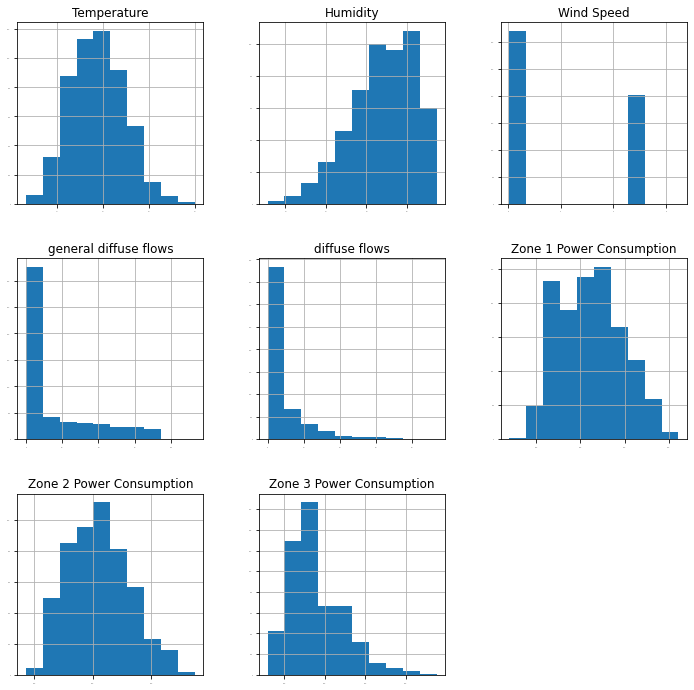

In [11]:
# Plot a histogram
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

What does this tell us? Temperature, Zone 1, and Zone 2 have normal distibutions of values. Humidity and Zone 3 Power Consumption are a bit skewed. Both Diffuse flows zolumns are very skewed, and wind speed seems to be between very close to either values of 0 and 5. I will later rescale, standardize, normalize to account for any weirdness in the data.

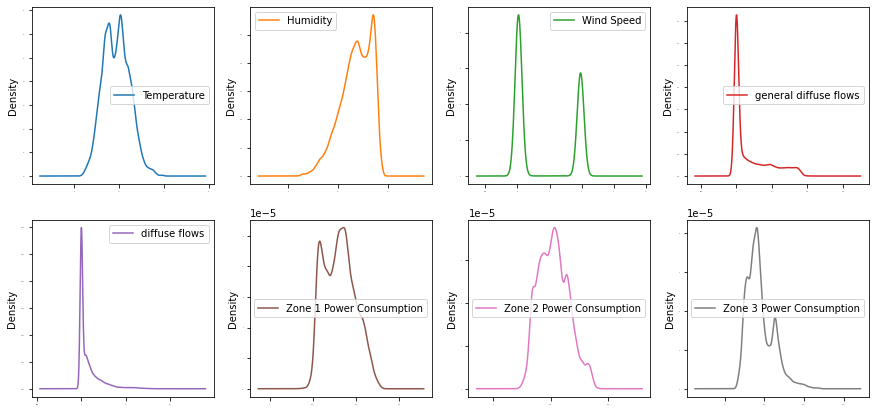

In [12]:
# Plot Density
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

Diffuse flows and General Diffuse flows may be too similar of features to keep both.

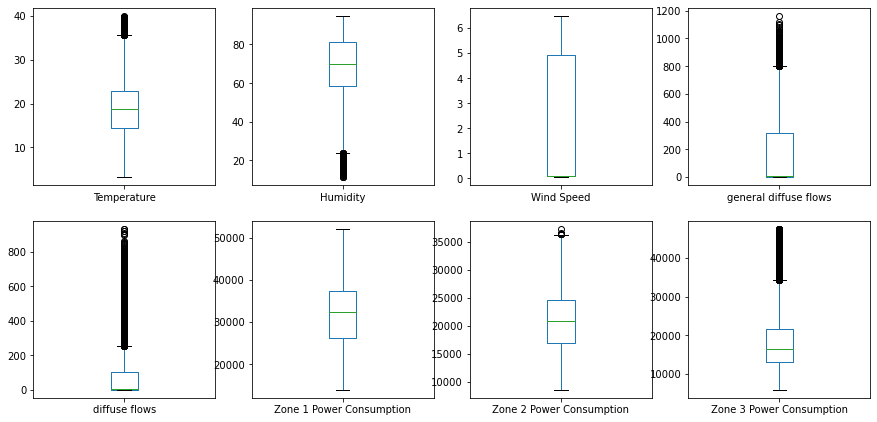

In [13]:
# Plot Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

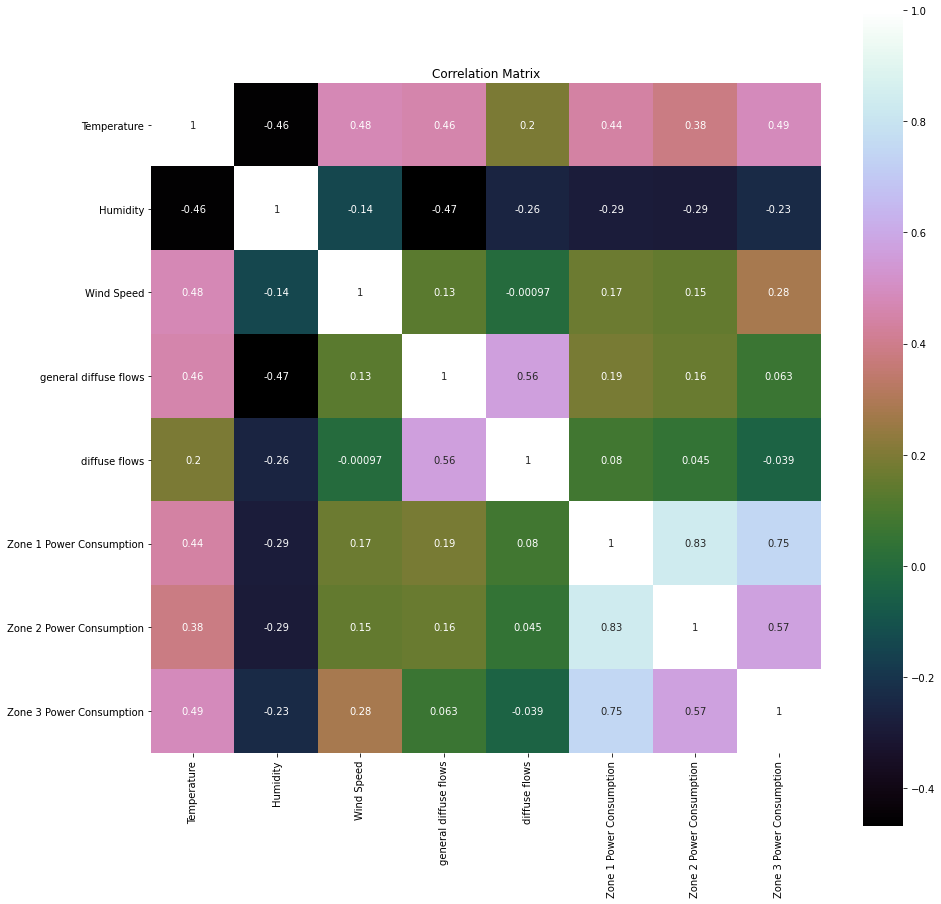

In [14]:
# correlation
correlation = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

So from my initial hypothesis, I thought that temperature would be the largest predictor for power consumption, and I was correct. Sort of. I didn't intend to include the other Zones in my features. So for example, I intended to have 1 features dataframe and 3 targets, each Zone would be a target. However, because of the correlation making the zones the best predictors, it might be good to have 3 datasets and 3 targets. 

Also worth noting that Diffuse Flows and General Diffuse flows are only .56 correlated and I may not need to drop one of them.

##### Two Options are:

Predict each zone using features and other zones
1. df_1 = Features + Zone 2 + Zone 3
2. df_2 = Features + Zone 1 + Zone 3
3. df_2 = Features + Zone 1 + Zone 2

Predict each zone using *ONLY* features
1. Target_1 = Zone 1, df = Features
2. Target_2 = Zone 2, df = Features
3. Target_3 = Zone 3, df = Features

There aren't many features but there are 54000 rows. I'm unsure of the time it will take to run the models but if time is not an issue doing all 6 could be valuable, even if only for the best models.

My expected procedure will be to create a class or function that takes in a model, cross validation fold number, X, and Y, and returns the training and test scores. Possibly even returning a confusion matrix for more evaluation.

In [15]:
print(data.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption', 'Zone 2 Power Consumption',
       'Zone 3 Power Consumption'],
      dtype='object')


In [16]:
# Time-Series Analysis

Y_1 = data["Zone 1 Power Consumption"]
Y_2 = data["Zone 2 Power Consumption"]
Y_3 = data["Zone 3 Power Consumption"]

def plot_time_series(Y):
    """
    Inputs: Target Variable
    Returns: Nothing
    Prints: Time-Series Analysis Plots
    
    Period = 144 because there are 144 10-minute intervals in a day. I'm assume 1 day is the period. 
    Trend line should be stable now.
    """
    
    res = sm.tsa.seasonal_decompose(Y, period = 144)
    fig = res.plot()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    plt.show()

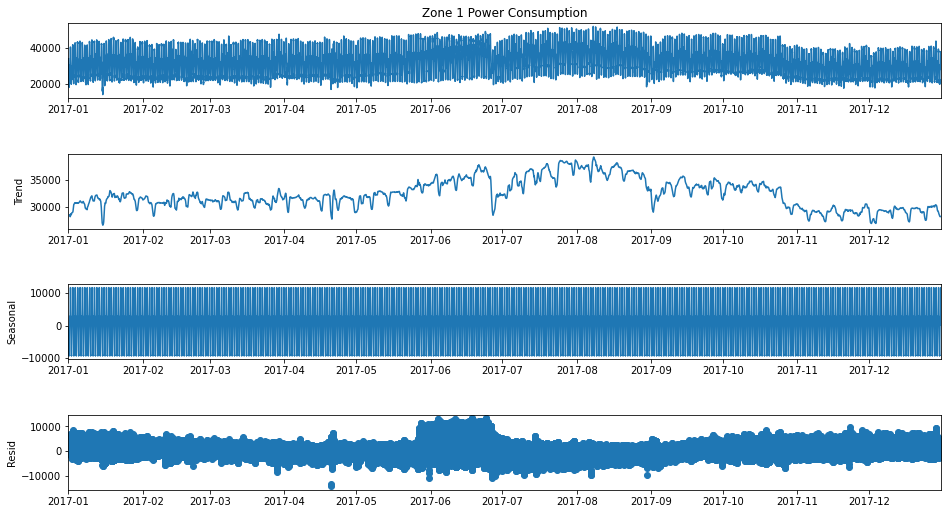

In [17]:
# Plot Zone 1
plot_time_series(Y_1)

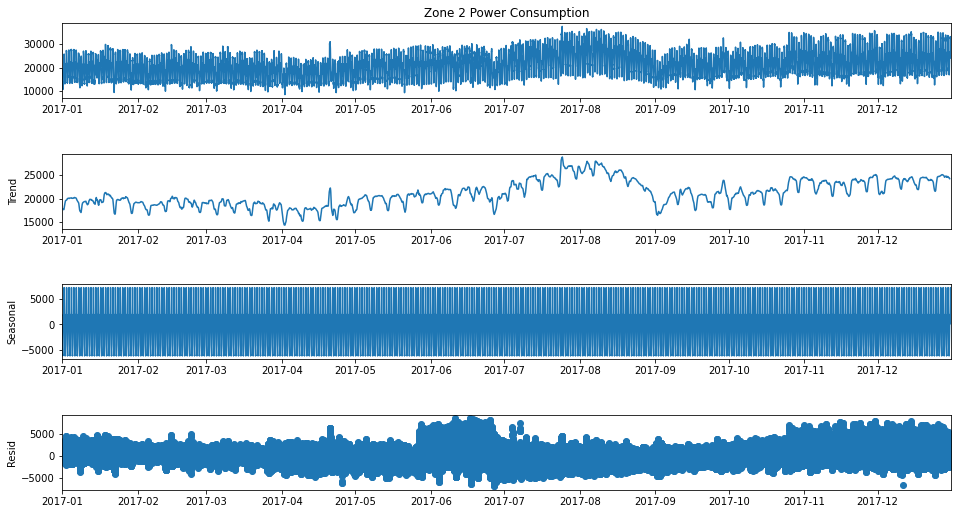

In [18]:
# Plot Zone 2
plot_time_series(Y_2)

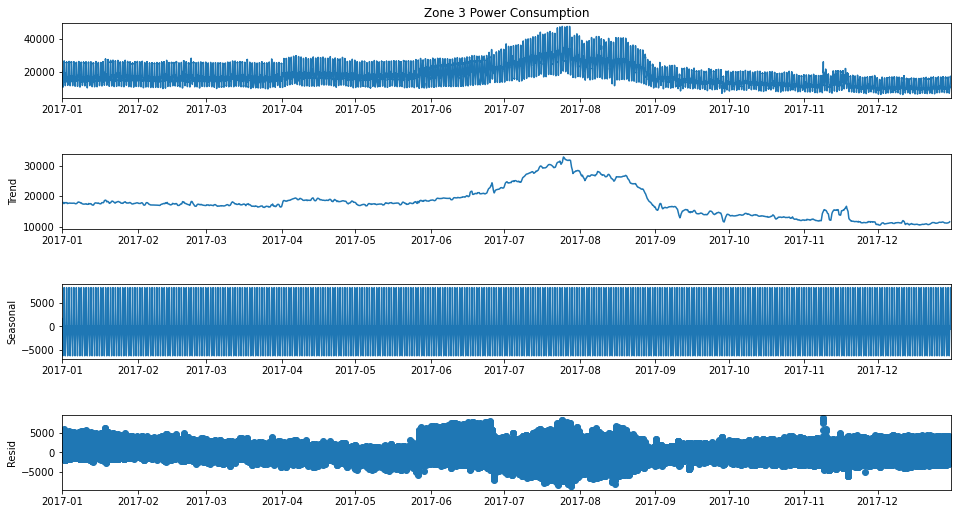

In [19]:
# Plot Zone 3
plot_time_series(Y_3)

In [20]:
# I checked for null value previously, but didn't explicitly mention it, here is a quick way to do so
print('Null Values =',data.isnull().values.any())

Null Values = False


## 3. Data Preperation

In this section I will be rescaling, standardizing, and normalizing the data using Sklearn libraries

In [21]:
# Seperate data in X and Y using the rules I mentioned above

Y_1 = data["Zone 1 Power Consumption"]
Y_2 = data["Zone 2 Power Consumption"]
Y_3 = data["Zone 3 Power Consumption"]

df_1 = data.drop('Zone 1 Power Consumption', axis=1)
df_2 = data.drop('Zone 2 Power Consumption', axis=1)
df_3 = data.drop('Zone 3 Power Consumption', axis=1)

features_only_df = data.drop(['Zone 1 Power Consumption',
                             'Zone 2 Power Consumption',
                             'Zone 3 Power Consumption'], axis=1)

In [22]:
# Check everything is correct
# Uncomment each df individually to check

#Y_1.head(2)
#Y_2.head(2)
#Y_3.head(2)

#df_1.head(2)
#df_2.head(2)
#df_3.head(2)

features_only_df.head(2)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
DateTime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085


Rescale, Standardize, and Normalize data. TBD if I will use this but it's good to have

In [23]:
# Rescale Data
rescaler = MinMaxScaler(feature_range=(0, 1))
rescaled_df_1 = pd.DataFrame(rescaler.fit_transform(df_1))
rescaled_df_2 = pd.DataFrame(rescaler.fit_transform(df_2))
rescaled_df_3 = pd.DataFrame(rescaler.fit_transform(df_3))
rescaled_features_only = pd.DataFrame(rescaler.fit_transform(features_only_df))

# Standardize Data
Standardised_df_1 = pd.DataFrame(StandardScaler().fit_transform(df_1))
Standardised_df_2 = pd.DataFrame(StandardScaler().fit_transform(df_2))
Standardised_df_3 = pd.DataFrame(StandardScaler().fit_transform(df_3))
Standardised_features_only = pd.DataFrame(StandardScaler().fit_transform(features_only_df))

# Normalize Data
normalized_df_1 = pd.DataFrame(Normalizer().fit_transform(df_1))
normalized_df_2 = pd.DataFrame(Normalizer().fit_transform(df_2))
normalized_df_3 = pd.DataFrame(Normalizer().fit_transform(df_3))
normalized_features_only = pd.DataFrame(Normalizer().fit_transform(features_only_df))

## 4. Train-Test-Split

Seperate the data into training and validation sets. I think the data is dependent on the time-series so I have to seperate it non-randomly

In [24]:
# Instantiate common params, then split the data
# For standard models, use random train-test-split, for time-series, split the data while in the series

test_size = .20
random_state = 42

X1_train, X1_test, y1_train, y1_test = train_test_split(normalized_features_only, Y_1, 
                                                        test_size = .2, 
                                                        random_state = random_state)

X2_train, X2_test, y2_train, y2_test = train_test_split(normalized_features_only, Y_2,
                                                        test_size = .2, 
                                                        random_state = random_state)

X3_train, X3_test, y3_train, y3_test = train_test_split(normalized_features_only, Y_3,
                                                        test_size = .2, 
                                                        random_state = random_state)

base_models_X_trains = [X1_train, X2_train, X3_train]
base_models_X_tests = [X1_test, X2_test, X3_test]
base_models_y_trains = [y1_train, y2_train, y3_train]
base_models_y_tests = [y1_test, y2_test, y3_test]

In [25]:
# # Instantiate common params, then split the data

# train_size = int(len(data) * (1-test_size))

# X_dfs = [df_1, df_2, df_3, features_only_df]
# Y_dfs = [Y_1, Y_2, Y_3]
# X_trains = []
# X_vals = []
# Y_trains = []
# Y_vals = []

# for X in X_dfs:
#     X_train, X_validation = X[0:train_size], X[train_size:len(X)]
#     X_trains.append(X_train)
#     X_vals.append(X_validation)
    
# for Y in Y_dfs:
#     Y_train, Y_validation = Y[0:train_size], Y[train_size:len(X)]
#     Y_trains.append(Y_train)
#     Y_vals.append(Y_validation)

## 5.1 Base Modeling Techniques

First I'll create a list of basic models and a function that runs each of them storing the scores

In [26]:
# Instantiate number of folds for cross-validation, then begin adding basic models to a list
cv = 3

models = []

# Standard Models
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Neural Network
models.append(('MLP', MLPRegressor()))

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [27]:
# Create a function to run the models for us so we can loop through them

# Instantiate an empty list for the names of the models
names = []

def run_models(X_train, Y_train, cv):
    """
    Inputs: X_train: A DataFrame with our X training set
            Y_train: A DataFrame with our Y training set
            cv:      Number of cross validation folds
    
    Outputs: Results: A list of the cv_results from each model
    """
    results = []
    for name, model in models:
        kfold = KFold(n_splits=cv, random_state=random_state)
        cv_results = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, np.sqrt(cv_results.mean()), np.sqrt(cv_results.std()))
        print(msg)
    return results

In [30]:
# Run the models on each different dataset
# Takes about 15 minutes with cv=3

print("df_1, Y_1")
print("Predicting Zone 1 using Features + Zone 2 + Zone 3")
df_1_results = run_models(base_models_X_trains[0], base_models_y_trains[0], cv)

print()
print("df_2, Y_2")
print("Predicting Zone 2 using Features + Zone 1 + Zone 3")
df_2_results = run_models(base_models_X_trains[1], base_models_y_trains[1], cv)

print()
print("df_3, Y_3")
print("Predicting Zone 3 using Features + Zone 1 + Zone 2")
df_3_results = run_models(base_models_X_trains[2], base_models_y_trains[2], cv)

df_1, Y_1
Predicting Zone 1 using Features + Zone 2 + Zone 3
LR: 6438.446662 (625.241147)
LASSO: 6438.697710 (623.852820)
EN: 7052.730361 (799.479016)
KNN: 6218.203557 (792.134963)
CART: 7653.722037 (742.275602)
MLP: 6820.272278 (950.158249)
ABR: 6495.047162 (733.226636)
GBR: 6045.979849 (777.536262)
XGB: 5771.539640 (585.729613)
RFR: 5628.494202 (605.400128)
ETR: 5651.294718 (508.398757)

df_2, Y_2
Predicting Zone 2 using Features + Zone 1 + Zone 3
LR: 4778.715726 (452.535900)
LASSO: 4779.063708 (452.529287)
EN: 5150.083378 (537.908281)
KNN: 4579.774740 (551.780030)
CART: 5683.310793 (519.547488)
MLP: 4947.026528 (620.892992)
ABR: 4884.650279 (440.800606)
GBR: 4462.316246 (529.048459)
XGB: 4222.701612 (367.810324)
RFR: 4112.396789 (434.329450)
ETR: 4117.191298 (431.765416)

df_3, Y_3
Predicting Zone 3 using Features + Zone 1 + Zone 2
LR: 5917.928619 (645.146006)
LASSO: 5918.098531 (649.932943)
EN: 6608.673674 (814.806221)
KNN: 5256.949724 (694.968131)
CART: 6088.156567 (504.428458)
ML

In [31]:
# sqrt the results
sqrt_1_results = []
for x in df_1_results:
    sqrt_1_results.append(np.sqrt(x))
    
sqrt_2_results = []
for y in df_2_results:
    sqrt_2_results.append(np.sqrt(y))
    
sqrt_3_results = []
for z in df_3_results:
    sqrt_3_results.append(np.sqrt(z))

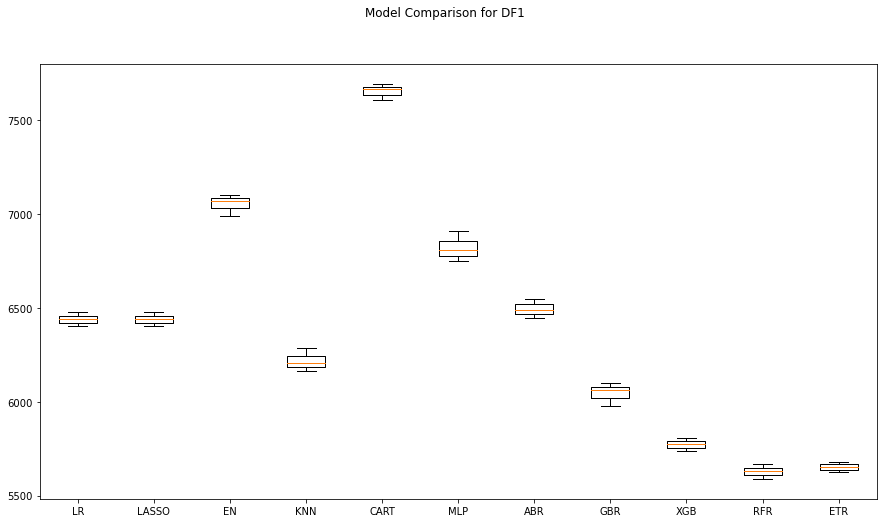

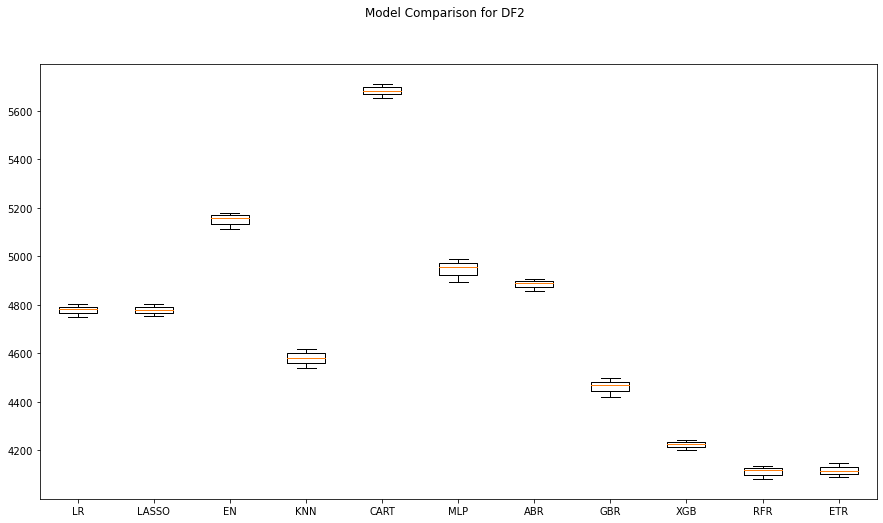

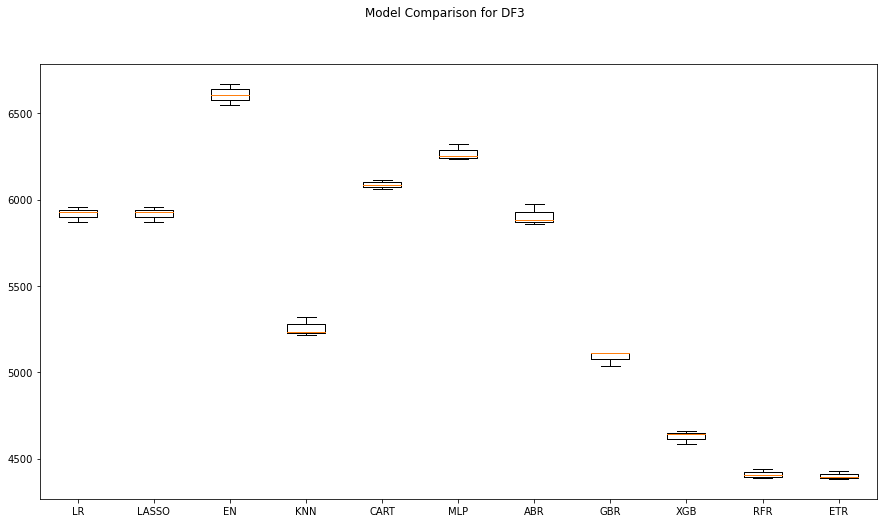

In [32]:
names = names[:11]

# Compare Models
fig = plt.figure()
fig.suptitle('Model Comparison for DF1')
ax = fig.add_subplot(111)
plt.boxplot(sqrt_1_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

fig = plt.figure()
fig.suptitle('Model Comparison for DF2')
ax = fig.add_subplot(111)
plt.boxplot(sqrt_2_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

fig = plt.figure()
fig.suptitle('Model Comparison for DF3')
ax = fig.add_subplot(111)
plt.boxplot(sqrt_3_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [33]:
# Neural Net
run_NN = False

def create_model(neurons=12, activation='relu', learn_rate = 0.01):
    # create model
    model = Sequential()
    model.add(Dense(neurons, activation=activation))
    
    # The number of hidden layers can be increased
    model.add(Dense(10, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(3, activation=activation))
    
    # Final output layer
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    optimizer = SGD(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model   

if run_NN:
    model = KerasRegressor(build_fn=create_model)

In [34]:
# model.fit(df_1, Y_1, epochs=50, batch_size=32, validation_split=0.1)

XGBoost, Random Forest Regressor, and Extra Trees Regressor are the clear best 3 models when it comes to the Normalized and fully random splits. They also perform near the top when the data is still sequential. Lets move forward with these 3 after the Time-Series Modeling

## 5.2 Time-Series Modeling Techniques

Here I will begin with Time-Series modeling. The techniques performed in this section should be better than the models previously used

###### Sarima Model
I previously attempted these without resampling down and it was impossible to run anything. To be honest, most of the data is redundant so I don't think downsampling will have any negative effects.


In [27]:
# Downsample from 10M to 1H
sarima_data = data.resample("1H").mean()
#Set the new Y value
Y_sarima1H = sarima_data['Zone 1 Power Consumption']

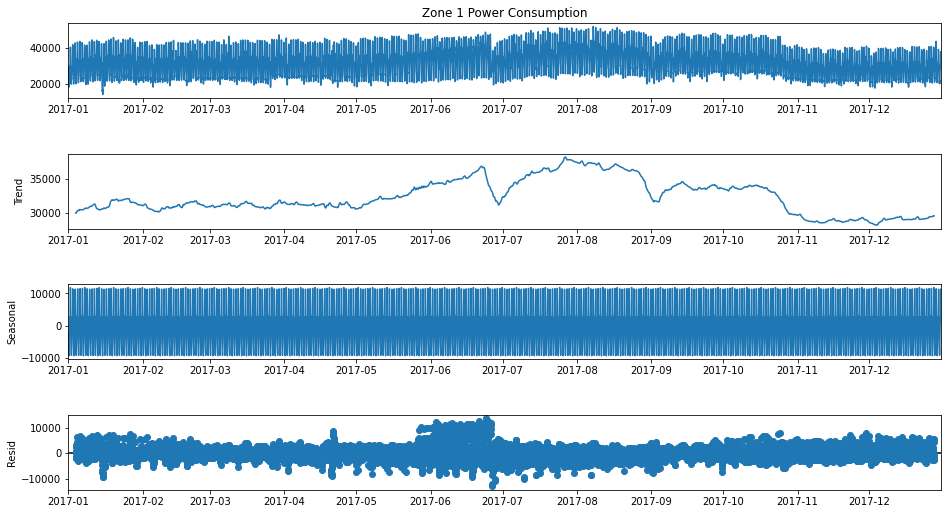

In [30]:
plot_time_series(Y_sarima1H)

In [32]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [33]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(Y_sarima1H,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=206610.80170787577
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=202446.2226286584
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=188259.39633344146
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=177850.38386076115
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=188005.78613650938
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=182149.4842844728
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=156462.30001957322
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=156127.3125206794
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=200089.28471430426
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=198784.72160674797
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=180919.26409335056
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=178751.4840427689
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=197824.52662951063
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=197592.8133685984
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=148608.3191711488
A

In [34]:
# From the grid search above, find the best parameters
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (1, 1, 1, 12)
aic          1.41e+05
Name: 47, dtype: object

In [43]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Y_sarima1H, 
                                        order=(1, 0, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8657      0.004    218.580      0.000       0.858       0.873
ma.L1          0.2308      0.007     35.033      0.000       0.218       0.244
ar.S.L12      -0.9756      0.002   -441.522      0.000      -0.980      -0.971
ma.S.L12      -0.0050      0.011     -0.471      0.638      -0.026       0.016
sigma2      6.394e+05   3590.240    178.093      0.000    6.32e+05    6.46e+05


In [91]:
pred = output.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=False)
pred_conf = pred.conf_int()

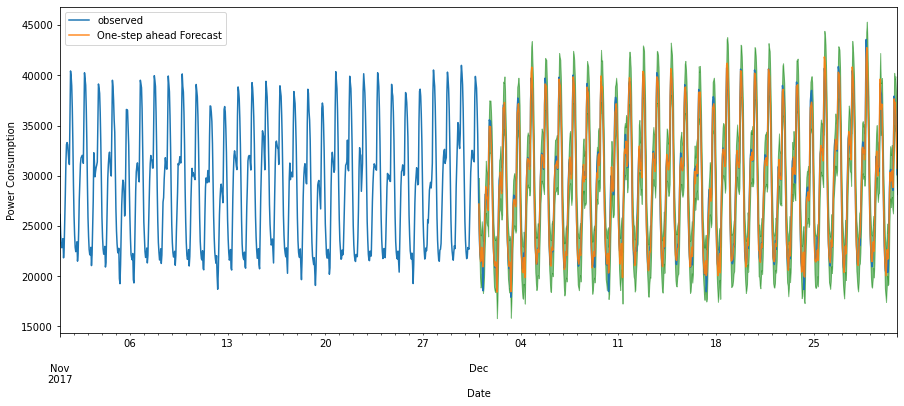

In [92]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = Y_sarima1H['2017-11-1':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')
plt.legend()

plt.show()

In [99]:
# Get the MSE
pc_pred = pred.predicted_mean

In [100]:
sarima_mse = np.sqrt(mean_squared_error(Y_sarima1H['2017-12-1':], pc_pred))
print('ARMA Mean Squared Error = {}'.format(sarima_mse))

ARMA Mean Squared Error = 651.3873150093048


This MSE is the best we have. On avaerage our gueses are 651 watts away from the true value. Just for curiosity, what is the mse if we predicted on the whole df?

In [102]:
# Obtain MSE
pred = output.get_prediction(dynamic=False)
pc_pred = pred.predicted_mean

sarima_mse = np.sqrt(mean_squared_error(Y_sarima1H, pc_pred))
print('ARMA Mean Squared Error = {}'.format(sarima_mse))

ARMA Mean Squared Error = 1003.6561340507766


An MSE of only 1003.66 is only slightly worse than the previous MSE we found and it is still better than all the other models we have tried.

###### Arima Model

In [35]:
# Resmaple the data like we did above to make it possible to use time-series. 53000 points is too much for my PC

arima_data = data.resample("1H").mean()
arimaY = arima_data['Zone 1 Power Consumption']

In [48]:
# For plotting purposes to make the plots more readable

split = int(len(arimaY)*.9)

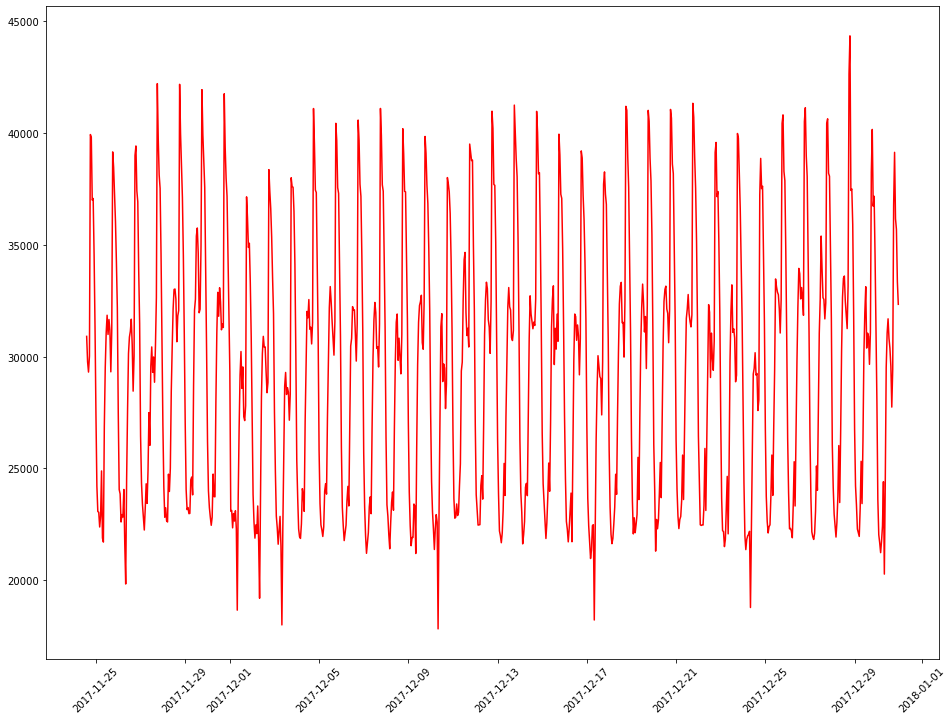

In [77]:
arima_1_model = ARIMA(arimaY, order=(2, 0, 2))
results_1 = arima_1_model.fit()

plt.subplots(figsize=(16, 12))
plt.xticks(rotation=45)
plt.plot(results.fittedvalues[split:], color='red');

In [78]:
#obtain MSE
arma_1_mse = np.sqrt(mean_squared_error(arimaY, results_1.predict()))
print('ARMA Mean Squared Error = {}'.format(arma_1_mse))

ARMA Mean Squared Error = 1970.5225876022953


This value is significantly lower than the MSE of the basic models

###### Arima with exog included

In [167]:
# exog just means the X values
arima_exog = features_only_df.resample('1H').mean()

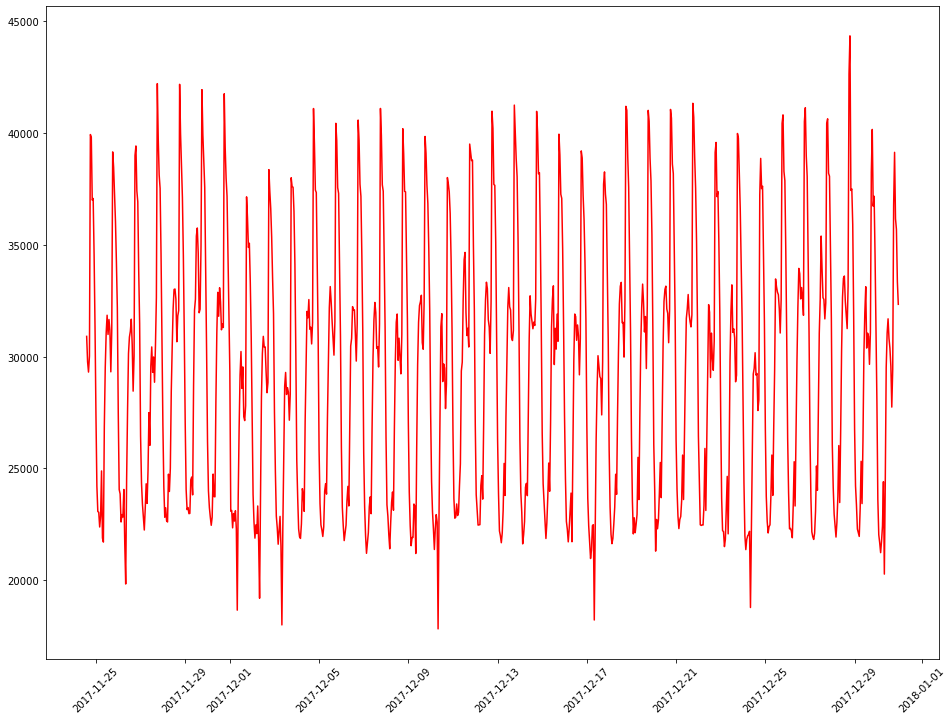

In [79]:
arima_2_model = ARIMA(arimaY, exog = arima_exog, order=(2, 0, 2))
results = arima_2_model.fit()

plt.subplots(figsize=(16, 12))
plt.xticks(rotation=45)
plt.plot(results.fittedvalues[split:], color='red');

In [80]:
arma_2_mse = np.sqrt(mean_squared_error(arimaY, results.predict()))
print('ARMA Mean Squared Error = {}'.format(arma_2_mse))

ARMA Mean Squared Error = 1930.4520433773034


Slightly better by including the X-values

## 6. Parameter Tuning / Grid Search

I'm going to select the 3 lowest MSE learners from the earlier batch of learners and grid search them to try and get their MSE closer to the ARMA model. Currently the ARMA model with (2,2) as our parameters is the best model with an MSE of only 450.65, which is a very impressive score.

top_models = XGB (XGBoost Regressor), RFR (Random Forest Regression, and ETR (Extra Trees Regressor)

### 6.1 XGB Regressor Grid Search and Test MSE

In [43]:
# 1. Grid search : XGBRegressor 
'''
n_estimators :  Number of gradient boosted trees. Equivalent to number of boosting rounds.
max_leaves : Maximum number of leaves; 0 indicates no limit.

''' 
cv = 3
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}

model = XGBRegressor(random_state=random_state)
kfold = KFold(n_splits=cv, random_state=random_state)
xgb_grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
xgb_grid_result = xgb_grid.fit(X1_train, y1_train)
print("Best: %f using %s" % (xgb_grid_result.best_score_, xgb_grid_result.best_params_))
xgb_means = xgb_grid_result.cv_results_['mean_test_score']
xgb_stds = xgb_grid_result.cv_results_['std_test_score']
xgb_params = xgb_grid_result.cv_results_['params']
for mean, stdev, param in zip(xgb_means, xgb_stds, xgb_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -33310669.812651 using {'n_estimators': 100}
-33583399.186691 (426767.638476) with: {'n_estimators': 50}
-33310669.812651 (343079.180086) with: {'n_estimators': 100}
-33485469.652105 (347815.701802) with: {'n_estimators': 150}
-33644029.435018 (242904.233117) with: {'n_estimators': 200}
-33847082.037915 (214211.042758) with: {'n_estimators': 250}
-34064136.123140 (213963.559692) with: {'n_estimators': 300}
-34250360.154506 (322521.575872) with: {'n_estimators': 350}
-34391034.460300 (306863.132886) with: {'n_estimators': 400}


In [44]:
np.sqrt(-1*xgb_grid_result.best_score_)

5771.53963970195

In [61]:
# Create a final XGB Model using the parameters above (n_estimators = 100), predict on the test set
# Obtain an MSE from the test set

xgb_model = XGBRegressor(random_state = random_state, n_estimators = 100)
xgb_model.fit(X1_train, y1_train)
xgb_y_pred = xgb_model.predict(X1_test)
xgb_mse = mean_squared_error(y1_test, xgb_y_pred)

print(np.sqrt(xgb_mse))

5660.0895374501


### 6.2 Extra Trees Regressor Grid Search and Test MSE

In [48]:
# 2. Grid search : ExtraTreesRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
''' 
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
             'max_depth': [2, 4, 6, 8]}
model = ExtraTreesRegressor(random_state=random_state)
kfold = KFold(n_splits=cv, random_state=random_state)
ETR_grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
ETR_grid_result = ETR_grid.fit(X1_train, y1_train)
print("Best: %f using %s" % (ETR_grid_result.best_score_, ETR_grid_result.best_params_))
ETR_means = ETR_grid_result.cv_results_['mean_test_score']
ETR_stds = ETR_grid_result.cv_results_['std_test_score']
params = ETR_grid_result.cv_results_['params']
for mean, stdev, param in zip(ETR_means, ETR_stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -37227491.889125 using {'max_depth': 8, 'n_estimators': 100}
-45216092.198775 (615278.136197) with: {'max_depth': 2, 'n_estimators': 50}
-45329271.627279 (610761.146338) with: {'max_depth': 2, 'n_estimators': 100}
-45363851.810273 (645482.081416) with: {'max_depth': 2, 'n_estimators': 150}
-45300443.678907 (656999.332732) with: {'max_depth': 2, 'n_estimators': 200}
-45276953.842501 (648833.295954) with: {'max_depth': 2, 'n_estimators': 250}
-45291449.132762 (645652.956302) with: {'max_depth': 2, 'n_estimators': 300}
-45214615.410026 (643628.689462) with: {'max_depth': 2, 'n_estimators': 350}
-45195270.140369 (645911.334181) with: {'max_depth': 2, 'n_estimators': 400}
-41306032.313255 (533406.852661) with: {'max_depth': 4, 'n_estimators': 50}
-41237994.981870 (535946.526950) with: {'max_depth': 4, 'n_estimators': 100}
-41220290.427464 (542681.996413) with: {'max_depth': 4, 'n_estimators': 150}
-41174480.605568 (560072.013370) with: {'max_depth': 4, 'n_estimators': 200}
-41095419.7

In [49]:
np.sqrt(-1*ETR_grid_result.best_score_)

6101.433592945615

In [60]:
# Create a final ETR Model using the parameters above (max_depth = 8, n_estimators = 100), predict on the test set
# Obtain an MSE from the test set

etr_model = XGBRegressor(random_state = random_state, max_depth = 6, n_estimators = 400)
etr_model.fit(X1_train, y1_train)
etr_y_pred = etr_model.predict(X1_test)
etr_mse = mean_squared_error(y1_test, etr_y_pred)

print(np.sqrt(etr_mse))

5721.942533832754


### 6.3 Random Forest Regression Grid Search and Test MSE

In [51]:
# 3. Grid search : Random Forest Regressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
''' 
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
             'max_depth': [2, 4, 6, 8]}
model = RandomForestRegressor(random_state=random_state)
kfold = KFold(n_splits=cv, random_state=random_state)
RFR_grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
RFR_grid_result = RFR_grid.fit(X1_train, y1_train)
print("Best: %f using %s" % (RFR_grid_result.best_score_, RFR_grid_result.best_params_))
RFR_means = RFR_grid_result.cv_results_['mean_test_score']
RFR_stds = RFR_grid_result.cv_results_['std_test_score']
params = RFR_grid_result.cv_results_['params']
for mean, stdev, param in zip(RFR_means, RFR_stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -35403559.767073 using {'max_depth': 8, 'n_estimators': 200}
-42930907.197813 (488314.221290) with: {'max_depth': 2, 'n_estimators': 50}
-42928713.333873 (490623.771920) with: {'max_depth': 2, 'n_estimators': 100}
-42929054.440868 (482298.546181) with: {'max_depth': 2, 'n_estimators': 150}
-42928685.038364 (480117.175105) with: {'max_depth': 2, 'n_estimators': 200}
-42926881.214315 (479004.902960) with: {'max_depth': 2, 'n_estimators': 250}
-42924582.237606 (479299.440816) with: {'max_depth': 2, 'n_estimators': 300}
-42922419.929234 (481984.198557) with: {'max_depth': 2, 'n_estimators': 350}
-42921162.422504 (482208.017586) with: {'max_depth': 2, 'n_estimators': 400}
-40243833.412165 (510689.859087) with: {'max_depth': 4, 'n_estimators': 50}
-40237824.298943 (507437.802018) with: {'max_depth': 4, 'n_estimators': 100}
-40238426.815269 (510112.659753) with: {'max_depth': 4, 'n_estimators': 150}
-40236289.611814 (513942.194299) with: {'max_depth': 4, 'n_estimators': 200}
-40239132.7

In [52]:
np.sqrt(-1*RFR_grid_result.best_score_)

5950.089055390122

In [59]:
# Create a final RFR Model using the parameters above (max_depth = 8, n_estimators = 200), predict on the test set
# Obtain an MSE from the test set

rfr_model = XGBRegressor(random_state = random_state, max_depth = 8, n_estimators = 200)
rfr_model.fit(X1_train, y1_train)
rfr_y_pred = etr_model.predict(X1_test)
rfr_mse = mean_squared_error(y1_test, rfr_y_pred)

print(np.sqrt(rfr_mse))

5721.942533832754


## 7. Forcasting all three zones using best model

Our best model was the SARIMA model with an mse of only 651 when predicting on values in only December, and an MSE of 1004 when predicting on the entire dataframe.

### Y1 - Zone 1

In [164]:
# Fit previous SARIMA model with proper zone
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Y_sarima1H, 
                                        order=(1, 0, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

In [165]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

watts_forcasted = pred_dynamic.predicted_mean

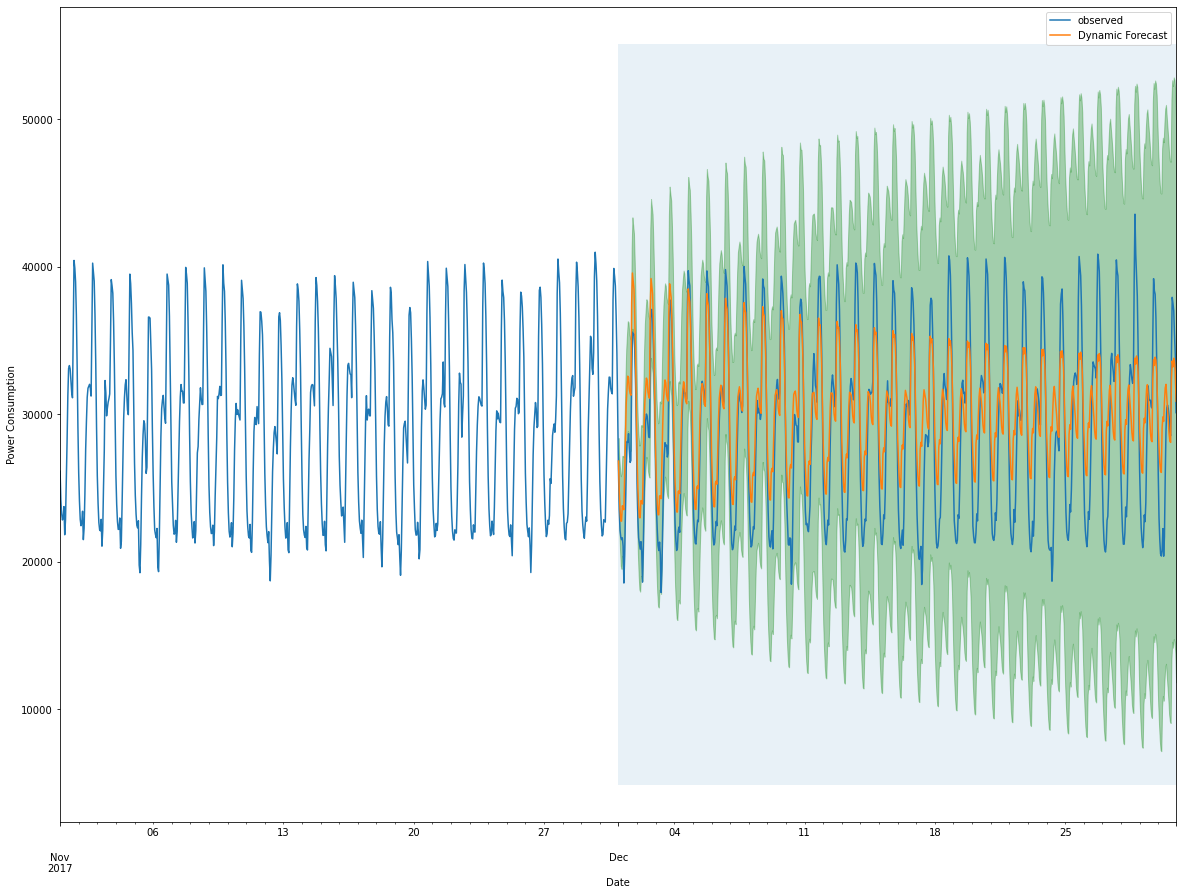

In [166]:
# Plot the dynamic forecast with confidence intervals.

ax = Y_sarima1H['2017-11-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-12-01'), watts_forcasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

plt.legend()
plt.show()

### Y2 - Zone 2

In [140]:
obtain only zone 2
Y2_sarima1H = sarima_data['Zone 2 Power Consumption']

In [141]:
# Fit previous SARIMA model with proper zone
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Y2_sarima1H, 
                                        order=(1, 0, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

In [142]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

watts_forcasted = pred_dynamic.predicted_mean

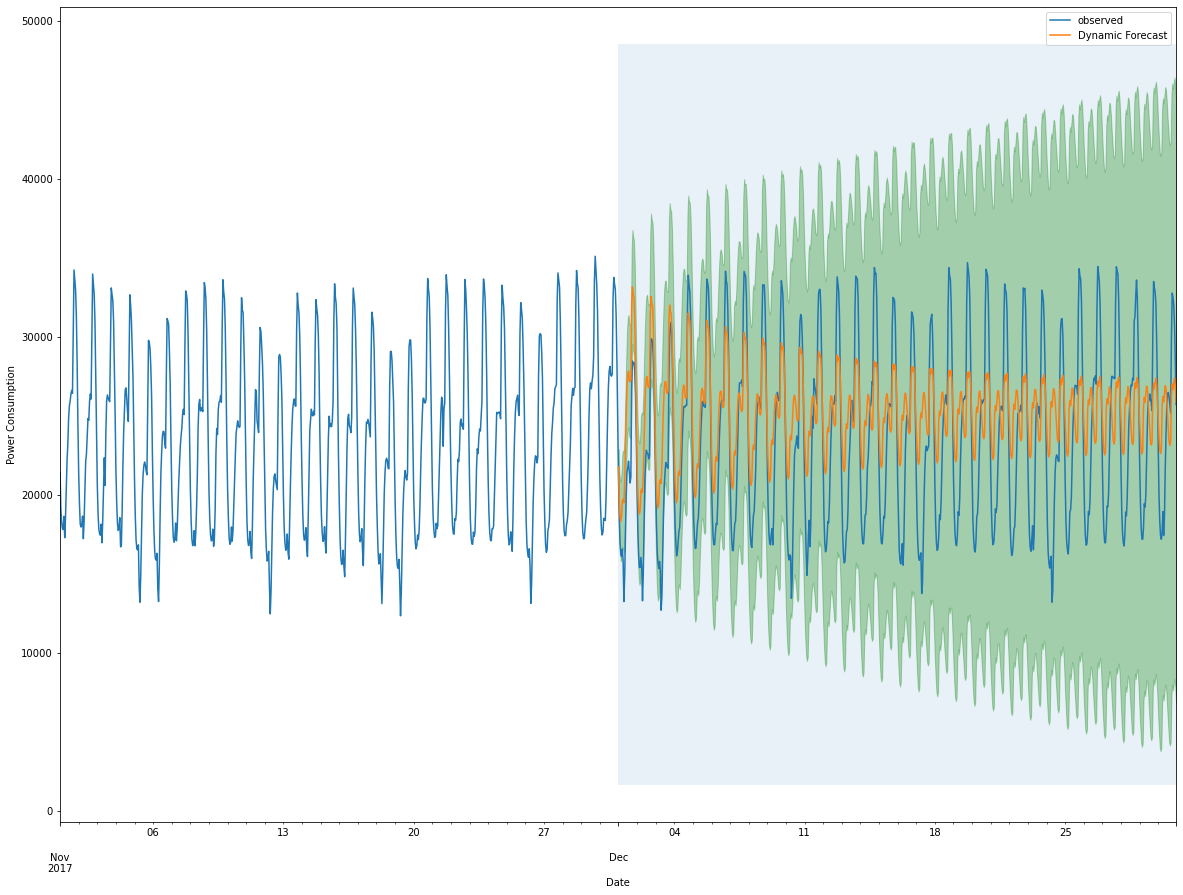

In [143]:
# Plot the dynamic forecast with confidence intervals.

ax = Y2_sarima1H['2017-11-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-12-01'), watts_forcasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

plt.legend()
plt.show()

### Y3 - Zone 3

In [145]:
# Obtain only zone 3
Y3_sarima1H = sarima_data['Zone 3 Power Consumption']

In [146]:
# Fit previous SARIMA model with proper zone
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Y3_sarima1H, 
                                        order=(1, 0, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

In [147]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

watts_forcasted = pred_dynamic.predicted_mean

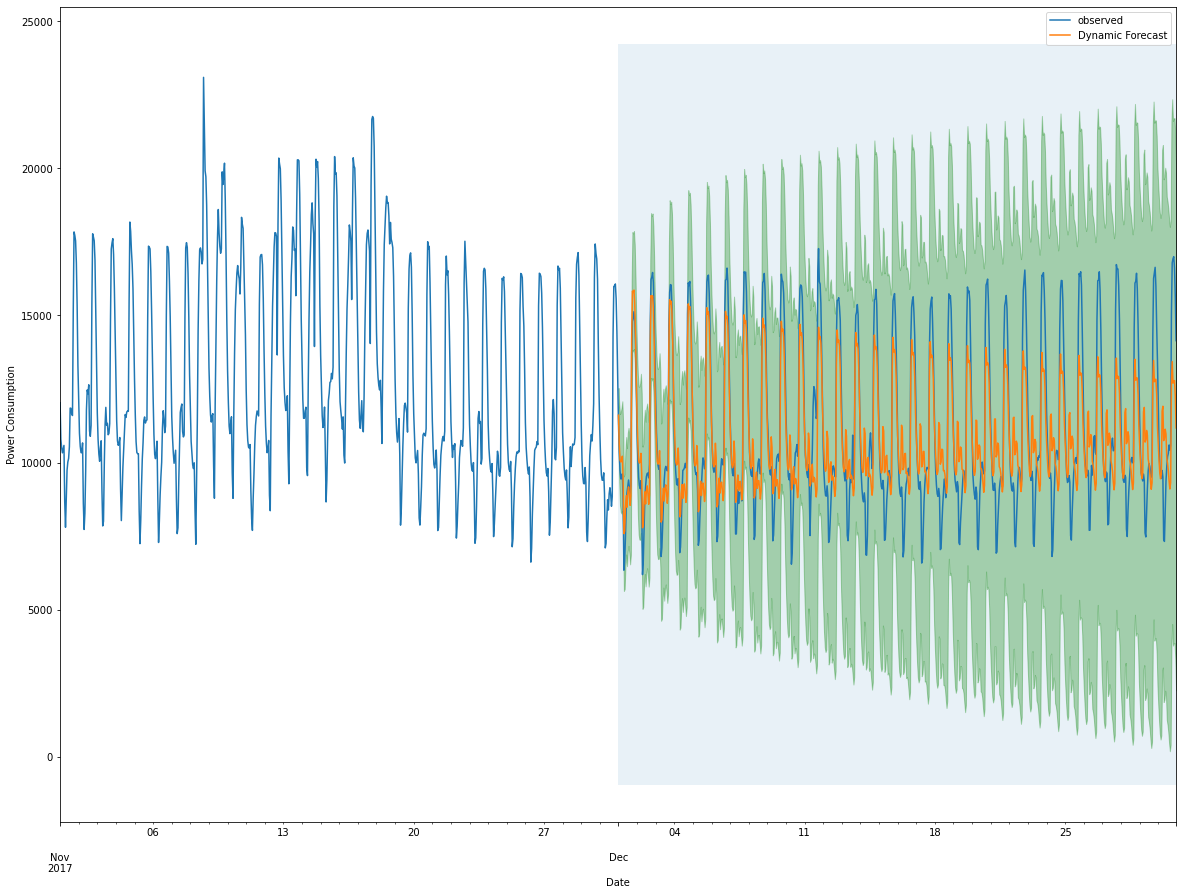

In [148]:
# Plot the dynamic forecast with confidence intervals.

ax = Y3_sarima1H['2017-11-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-12-01'), watts_forcasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

plt.legend()
plt.show()

# Conclusion

## Summary

In this project I attempted to analyze a dataset containing the power consumption of three zones within Tetouan, a city in Morocco. The dataset also contained a few predictors like temperature, wind speed, and humidity. Using these predictors, and the time series itself, I created an analysis and a plethora of models that tried to predict the power consumption. I compared the predicted values against the true values to obtain the error, and determine which model would be best suited for this type of problem. All of the standard models that didn't take the time series into account were only able to score a mean-squared-error of around 5000-7000, while the time series models were under 2000. The best model was the SARIMA model from statsmodels, and it scored an MSE of only 1004 when predicted along the whole dataset.

## Recommendations

1. Temperature is the most correlated feature. As temperature changes, power consumption follows. This makes logical sense because of air conditioning. If your goal is to reduce power consumption, consider implementing limits on AC/Heat usage during moderate days to conserve energy for more extreme days. If your goal is to understand when power consumption is at its greatest, consider safeguards and more robust facilities that can handle increased loads in summer and winter
2. Consider further research with demographics data. There are a lot of factors that will drive power consumption, housing and population for example. If this dataset could be compared with population data in each zone, more interesting conclusions could be drawn about the consumption and power requirements in each zone.
3. SARIMA Models worked the best and the SARIMA model I trained previously provided an error of only 1003 watts. That is quite accurate and can be used for forecasting power consumption in the future.

## Limitations

1. Only 1 year of data really limits larger conclusions.
2. While having 53000 data points is great, a lot of it is redundant because the points are recorded every 10 minutes. Not necessarily a limitation, but something to be wary of in the future.
3. Could've had better or more interesting predictors like zone populations or even categorical data like if the zone is primarily residential, industrial, or commercial.
